In [1]:
import cv2
from cv2 import equalizeHist as stretch_hist
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show_image(img, name):
    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    cv2.imshow(name, img)
    cv2.waitKey(0)

In [3]:
def show_hist(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'g')
    plt.hist(img.flatten(),256,[0,256], color = 'c')
    plt.xlim([0,256])
    plt.legend(('cdf','stretch hist'), loc = 'upper left')
    plt.show()

In [4]:
def equalize_hist(img, levels):
    new_img = np.zeros(img.shape, np.uint8)
    
    hist, bins = np.histogram(img.flatten(), 256, [0,256]) # count pixels in each level in original
    N = img.size 
    k = 0
    count = 0    
    for g in range(0, 256):
        count += hist[g]
        new_img[img == g] = k # set all those in level g to level k
        if count >= N/levels: # if more than threshold, move to next level in new image
            count = 0
            k = g + 1
            
    return new_img    

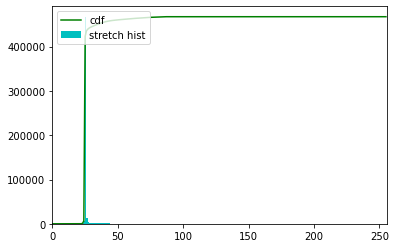

In [5]:
# original
p7q = cv2.imread("images/p7q.jpg")
p7q_gray = cv2.cvtColor(p7q, cv2.COLOR_BGR2GRAY)

show_image(p7q_gray, "p7q_original")
show_hist(p7q_gray)

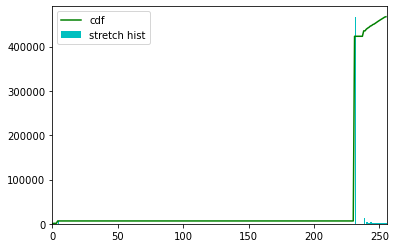

In [6]:
# stretched
p7q_stretch = stretch_hist(p7q_gray)

show_image(p7q_stretch, "p7q_stretch")
show_hist(p7q_stretch)

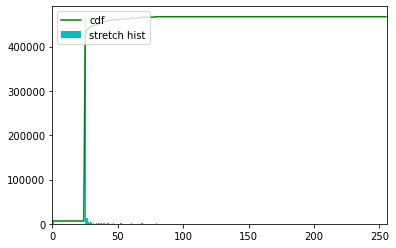

In [7]:
# stretched
p7q_equ = equalize_hist(p7q_gray, 256)

show_image(p7q_equ, "p7q_equ")
show_hist(p7q_equ)